In [1]:
import pandas as pd
import matplotlib.pyplot as plt
broadway = pd.read_csv("original_broadway.csv")
# listing columns header names

In [2]:
# check for blanks
broadway.info()
# No blank fields
# check for null values
broadway.isnull().any()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31296 entries, 0 to 31295
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date.Day                    31296 non-null  int64 
 1   Date.Full                   31296 non-null  object
 2   Date.Month                  31296 non-null  int64 
 3   Date.Year                   31296 non-null  int64 
 4   Show.Name                   31296 non-null  object
 5   Show.Theatre                31296 non-null  object
 6   Show.Type                   31296 non-null  object
 7   Statistics.Attendance       31296 non-null  int64 
 8   Statistics.Capacity         31296 non-null  int64 
 9   Statistics.Gross            31296 non-null  int64 
 10  Statistics.Gross Potential  31296 non-null  int64 
 11  Statistics.Performances     31296 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 2.9+ MB


Date.Day                      False
Date.Full                     False
Date.Month                    False
Date.Year                     False
Show.Name                     False
Show.Theatre                  False
Show.Type                     False
Statistics.Attendance         False
Statistics.Capacity           False
Statistics.Gross              False
Statistics.Gross Potential    False
Statistics.Performances       False
dtype: bool

In [3]:
#checking for duplicates
duplicates = broadway.duplicated()
sum(duplicates)
# no duplicates in data set

0

In [4]:
# splitting column names
import re
broadway.columns=[re.split(r'[.]', col)[1] for col in broadway.columns]
broadway.rename(columns={"Gross Potential": "Gross_Potential"}, inplace=True)



In [5]:
broadway.describe()

,Day,Month,Year,Attendance,Capacity,Gross,Gross_Potential,Performances
count,31296.000000,31296.000000,31296.000000,31296.000000,31296.000000,3.129600e+04,31296.000000,31296.000000
mean,15.720859,6.509043,2005.875128,8010.523006,80.738912,5.960688e+05,62.404045,7.224821
std,8.817000,3.430321,6.100118,3189.873933,18.842815,3.809796e+05,28.714589,2.235376
min,1.000000,1.000000,1990.000000,24.000000,10.000000,1.037000e+03,0.000000,0.000000
25%,8.000000,4.000000,2001.000000,5508.000000,70.000000,3.201085e+05,45.000000,8.000000
50%,16.000000,6.000000,2006.000000,7801.500000,83.000000,5.145200e+05,63.000000,8.000000
75%,23.000000,10.000000,2011.000000,10348.000000,95.000000,7.852690e+05,82.000000,8.000000
max,31.000000,12.000000,2016.000000,21631.000000,892.000000,3.201333e+06,226.000000,16.000000


In [6]:
#removing non numeric columns.  These will be looked at in Excel
broadway.drop(columns=['Full','Name', 'Theatre', 'Type'], inplace=True)
broadway.shape

(31296, 8)

In [7]:
#convert all text to lower case
#broadway.Name.apply(lambda x: x.lower())
#broadway.Theatre.apply(lambda x: x.lower())
#broadway.Type.apply(lambda x: x.lower())

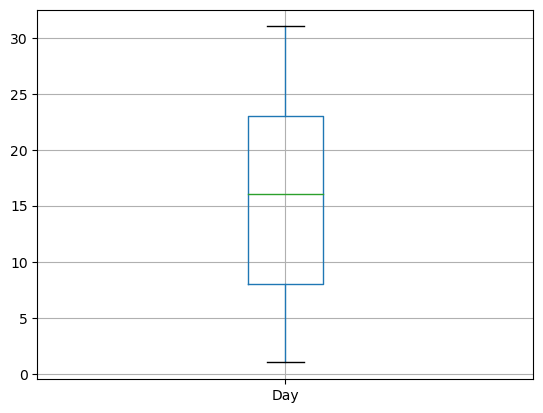

In [8]:
# visualizations
# import modules
import scipy as stats
import numpy as np

day= broadway.boxplot(column = 'Day')
day.plot()
plt.show()



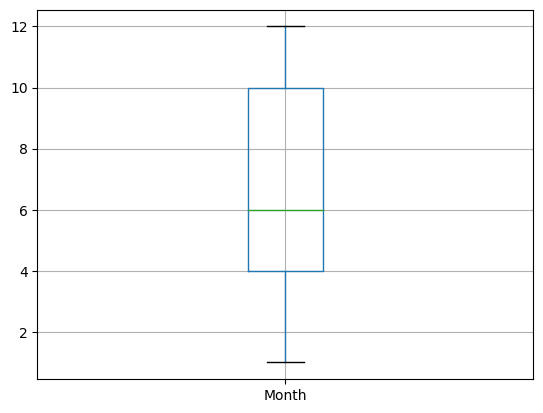

In [9]:
month = broadway.boxplot(column='Month')
month.plot()
plt.show()


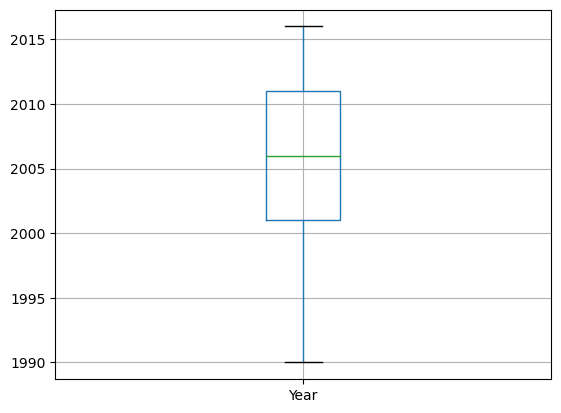

In [10]:
year = broadway.boxplot(column = 'Year')
year.plot()
plt.show()


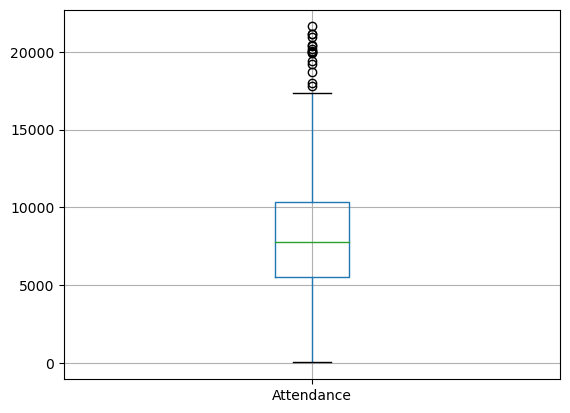

In [11]:
attendance = broadway.boxplot(column='Attendance')
attendance.plot()
plt.show()

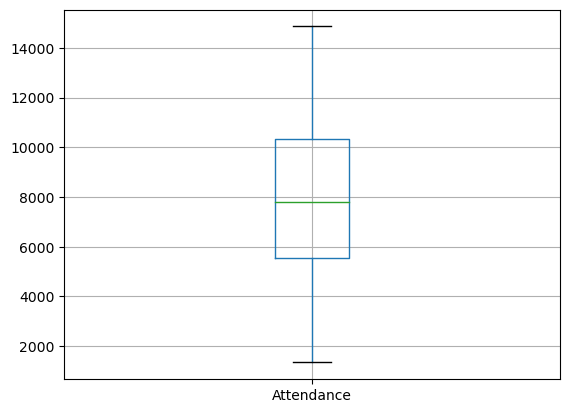

In [12]:
broadway_outliers = broadway[(broadway.Attendance < broadway.Attendance.quantile(.995)) & (broadway.Attendance > broadway.Attendance.quantile(.005))]
attendance_out = broadway_outliers.boxplot(column = 'Attendance')
attendance_out.plot()
plt.show()

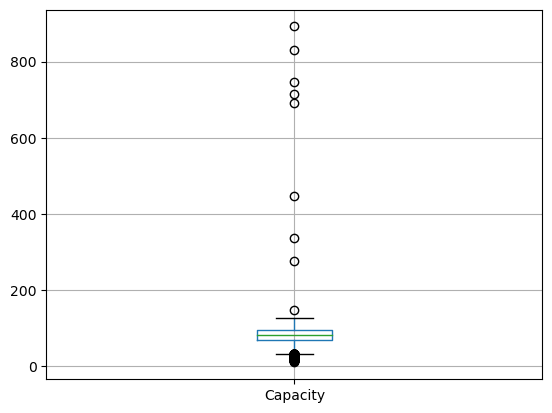

In [13]:
capacity = broadway.boxplot(column = 'Capacity')
capacity.plot()
plt.show()

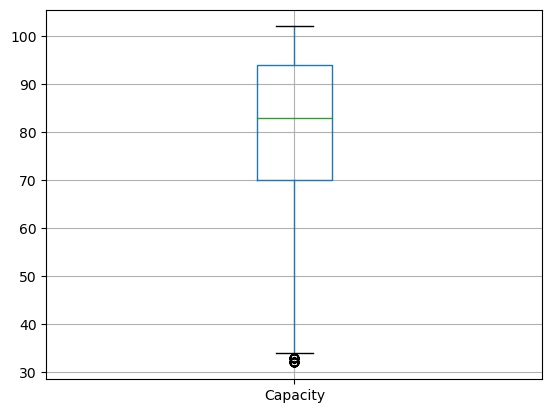

In [14]:
broadway_outliers = broadway[(broadway.Capacity < broadway.Capacity.quantile(.995)) & (broadway.Capacity > broadway.Capacity.quantile(.005))]

capacity_out = broadway_outliers.boxplot(column = 'Capacity')
capacity_out.plot()
plt.show()

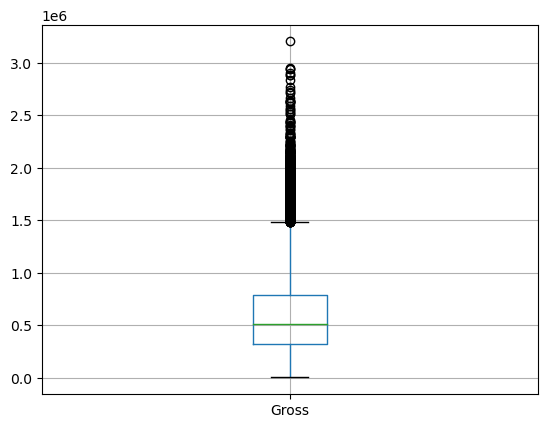

In [15]:
#broadway.hist('Gross')
gross = broadway.boxplot(column='Gross')
gross.plot()
plt.show()

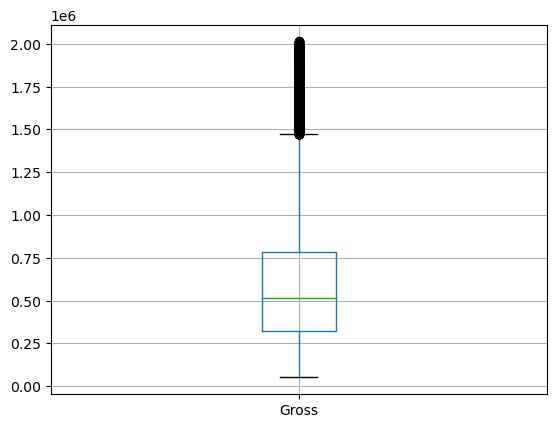

In [16]:
broadway_outliers = broadway[(broadway.Gross < broadway.Gross.quantile(.995)) & (broadway.Gross > broadway.Gross.quantile(.005))]
gross_out = broadway_outliers.boxplot(column = 'Gross')
gross_out.plot()
plt.show()

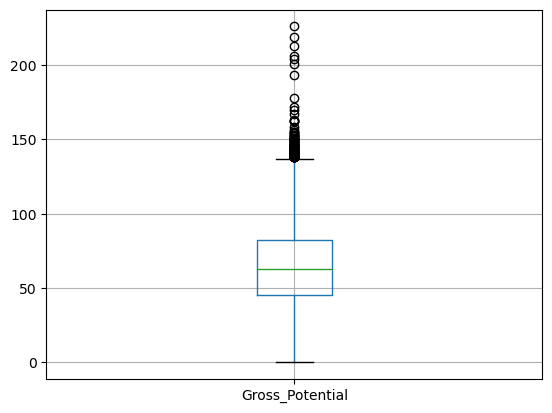

In [17]:
gross_potential = broadway.boxplot(column='Gross_Potential')
gross_potential.plot()
plt.show()

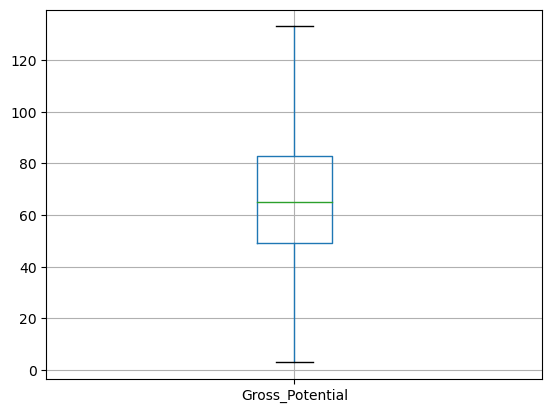

In [18]:
broadway_outliers = broadway[(broadway.Gross_Potential < broadway.Gross_Potential.quantile(.995)) & (broadway.Gross_Potential > broadway.Gross_Potential.quantile(.005))]
gross_potent = broadway_outliers.boxplot('Gross_Potential')
gross_potent.plot()
plt.show()


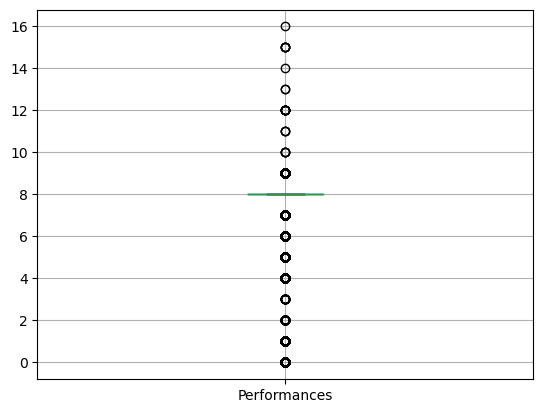

In [23]:
performances = broadway.boxplot(column='Performances')
performances.plot()
plt.show()

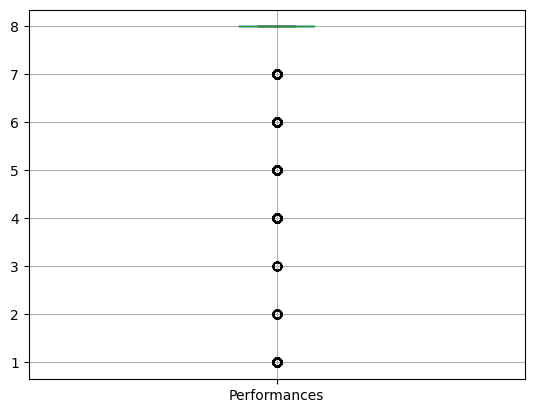

In [24]:
broadway_outliers = broadway[(broadway.Performances < broadway.Performances.quantile(.995)) & (broadway.Performances > broadway.Performances.quantile(.005))]
performances = broadway_outliers.boxplot('Performances')
performances.plot()
plt.show()

In [25]:

broadway_outliers.shape


(28636, 8)

In [26]:
broadway_outliers.corr()

,Day,Month,Year,Attendance,Capacity,Gross,Gross_Potential,Performances
Day,1.000000,0.010517,-0.003466,0.036510,0.065250,0.029614,0.045468,0.003780
Month,0.010517,1.000000,-0.049923,-0.013273,-0.033636,0.020382,0.014618,-0.016772
Year,-0.003466,-0.049923,1.000000,-0.021308,0.045067,0.409553,0.236047,0.027868
Attendance,0.036510,-0.013273,-0.021308,1.000000,0.584896,0.779146,0.425745,0.219903
Capacity,0.065250,-0.033636,0.045067,0.584896,1.000000,0.572013,0.572519,0.027977
Gross,0.029614,0.020382,0.409553,0.779146,0.572013,1.000000,0.619661,0.174315
Gross_Potential,0.045468,0.014618,0.236047,0.425745,0.572519,0.619661,1.000000,0.094733
Performances,0.003780,-0.016772,0.027868,0.219903,0.027977,0.174315,0.094733,1.000000


In [21]:
#broadway.describe()

In [22]:
#broadway.corr()